***
## Se cargan los datos
***

### Datos del Ayuntamiento de Madrid

In [1]:
# Comprobamos si tenemos las librerías instaladas, si no, la instalamos

try:
    import openpyxl
except ImportError:
    !pip install openpyxl

try:
    import xlrd
except ImportError:
    !pip install xlrd

Definimos una función para cargar los archivos del Ayuntamiento de Madrid por dos motivos:
- Se observan dos formatos: __.xls__ y __.xlsx__. 
- Cada archivo de Excel tiene varias hojas, donde cada una de ellas corresponde a un distrito y sus barrios. 

In [2]:
import os
import xlrd
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

def load_Excel_books(ruta_archivo):

    # Obtenemos la extensión del archivo
    extension = os.path.splitext(ruta_archivo)[1]

    # Comparamos la extensión con las cadenas de caracteres 'xls' y 'xlsx'
    if extension == '.xls':
        # Es un archivo de Excel en el formato .xls
        
        # Abrimos el archivo de Excel
        workbook = xlrd.open_workbook(ruta_archivo)

        # Obtenemos el nombre de las hojas del archivo de Excel
        sheet_names = workbook.sheet_names()

        # Leemos cada hoja del archivo de Excel y guardamos los datos en una lista de data frames
        sheets = []
        name_sheets = []

        for sheet_name in sheet_names:
            if not sheet_name.startswith(("Hoja3", "PORTADA", "INTRODUCCIÓN")):
                
                # Guardamos el nombre de la hoja
                name_sheets.append(sheet_name)

                # Abrimos la hoja del archivo de Excel
                sheet = workbook.sheet_by_name(sheet_name)

                # Obtenemos los datos de la hoja en una lista de listas
                data = []
                for row_index in range(sheet.nrows):
                    row = sheet.row_values(row_index)
                    data.append(row)

                # Creamos un data frame a partir de los datos de la hoja
                df = pd.DataFrame(data)

                # Añadimos el data frame a la lista de data frames
                sheets.append(df)


    elif extension == '.xlsx':
        # Es un archivo de Excel en el formato .xlsx
        
        # Abrimos el archivo de Excel
        workbook = openpyxl.load_workbook(ruta_archivo)

        # Obtenemos el nombre de las hojas del archivo de Excel
        sheet_names = workbook.sheetnames

        # Leemos cada hoja del archivo de Excel y guardamos los datos en una lista de data frames
        sheets = []
        name_sheets = []

        for sheet_name in sheet_names:
            if not sheet_name.startswith(("Hoja3", "PORTADA", "INTRODUCCIÓN")):

                # Guardamos el nombre de la hoja
                name_sheets.append(sheet_name)

                # Abrimos la hoja del archivo de Excel
                sheet = workbook[sheet_name]

                # Obtenemos los datos de la hoja en una lista de listas
                data = []
                for row in sheet.rows:
                    data.append([cell.value for cell in row])

                # Creamos un data frame a partir de los datos de la hoja
                df = pd.DataFrame(data)

                # Añadimos el data frame a la lista de data frames
                sheets.append(df)

    else:
        # No es un archivo de Excel
        print("El archivo no es un archivo de Excel")


    return(sheets, name_sheets)


# print(sheet_names)

In [3]:
# Cargamos los archivos

# Año 2016 
(xls_2016, name_sheet_2016) = load_Excel_books("Datos/panel_indicadores_distritos_barrios_2016.xls")

# Año 2017
(xls_2017, name_sheet_2017) = load_Excel_books("Datos/panel_indicadores_distritos_barrios_2017.xls")

# Año 2018
(xls_2018, name_sheet_2018) = load_Excel_books("Datos/panel_indicadores_distritos_barrios_2018.xls")

# Año 2019
(xls_2019, name_sheet_2019) = load_Excel_books("Datos/panel_indicadores_distritos_barrios_2019.xls")

# Año 2020 y 2021
(xls_2020_21, name_sheet_2020_21) = load_Excel_books("Datos/panel_indicadores_distritos_barrios_2020_2021.xlsx")

# Año 2022
(xls_2022, name_sheet_2022) = load_Excel_books("Datos/panel_indicadores_distritos_barrios_2022.xlsx")


### Datos del INE

In [4]:
# Cargamos los datos descargados del portal del INE
import pandas as pd

datos_INE = pd.read_csv("Datos/31097bsc_Madrid_INE.csv", 
                        sep=';', 
                        index_col=0, 
                        decimal=',', 
                        thousands='.')
print(datos_INE.info())

# Obtenemos los nombres únicos de los distritos, indicadores y períodos
name_distritos = datos_INE['Distritos'].unique()
name_indicadores = datos_INE['Indicadores de renta media y mediana'].unique()
name_periodo = datos_INE['Periodo'].unique()

print('\nDisponemos datos de los años:', name_periodo)

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 28079 Madrid to 28079 Madrid
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Distritos                             756 non-null    object 
 1   Secciones                             0 non-null      float64
 2   Indicadores de renta media y mediana  792 non-null    object 
 3   Periodo                               792 non-null    int64  
 4   Total                                 792 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 37.1+ KB
None

Disponemos datos de los años: [2020 2019 2018 2017 2016 2015]


El INE nombra a los distritos con números en lugar de utilizar el nombre real del distrito, es decir, 
$$ \text{CENTRO} = \text{Distrito 01}$$
. Como los datos del Ayuntamiento de Madrid emplea los nombres reales para designar al distrito, pasamos a modifican el Dataset del INE y utilizar el criterio de designar a cada distrito por su nombre real. De esta forma, vamos unificando los datos.

In [5]:
for i in range(0, len(name_sheet_2016)):
    print('Distrito ', i+1, ' --->', name_sheet_2016[i])


Distrito  1  ---> CENTRO
Distrito  2  ---> ARGANZUELA
Distrito  3  ---> RETIRO
Distrito  4  ---> SALAMANCA
Distrito  5  ---> CHAMARTÍN
Distrito  6  ---> TETUÁN
Distrito  7  ---> CHAMBERÍ
Distrito  8  ---> FUENCARRAL-EL PARDO
Distrito  9  ---> MONCLOA-ARAVACA
Distrito  10  ---> LATINA
Distrito  11  ---> CARABANCHEL
Distrito  12  ---> USERA
Distrito  13  ---> PUENTE DE VALLECAS
Distrito  14  ---> MORATALAZ
Distrito  15  ---> CIUDAD LINEAL
Distrito  16  ---> HORTALEZA
Distrito  17  ---> VILLAVERDE
Distrito  18  ---> VILLA DE VALLECAS
Distrito  19  ---> VICÁLVARO
Distrito  20  ---> SAN BLAS-CANILLEJAS
Distrito  21  ---> BARAJAS


In [6]:
# Modificamos el Dataset del INE
for i in range(0, len(name_sheet_2016)):
    datos_INE.loc[datos_INE['Distritos'] == name_distritos[i+1], 'Distritos'] = name_sheet_2016[i]

***
## Indicadores de interés
***

### Datos Ayuntamiento de Madrid

In [7]:
# Genera un dataset con las variables interés del archivo

def Get_Data(fichero, names_sheet_fichero, var_interes):

    # Creamos un dataframe para cada año/fichero
    df = pd.DataFrame()

    for ind_sheet in range(len(fichero)):

        i0_sheet = []
        # Listas para guardar las variables
        indicadores = []
        ciudad = []
        distrito = []
        i = 0

        # Recorremos todas las variables del dataset
        for i_0 in range(len(fichero[ind_sheet][0])): 

            if fichero[ind_sheet][0][i_0] is not None:
                # Si dichas variables empiezan por las variables de interés que tenemos en "var_interes"
                if fichero[ind_sheet][0][i_0].strip().startswith(var_interes): #.strip() elimina los espacios en blanco al principio y final de una cadena

                    # Valores de cada distrito
                    if i < 2:
                        if isinstance(fichero[ind_sheet].iloc[i_0, 3], str):
                            distrito.append( float(fichero[ind_sheet].iloc[i_0, 3].replace(".","").replace(",", ".")) )
                        else:
                            distrito.append( fichero[ind_sheet].iloc[i_0, 3] )
                    else:
                        if isinstance(fichero[ind_sheet].iloc[i_0, 4], str):
                            distrito.append( float(fichero[ind_sheet].iloc[i_0, 4].replace(".","").replace(",", ".")) )
                        else:
                            distrito.append( fichero[ind_sheet].iloc[i_0, 4] )
                    i = i + 1

                    # Solo necesitamos guardar estos valores una única vez
                    if ind_sheet == 0:
                        # Guardamos los valores de las variables
                        indicadores.append(fichero[ind_sheet][0][i_0].strip())
                        if fichero[ind_sheet].iloc[i_0, 2] is not None:
                            if isinstance(fichero[ind_sheet].iloc[i_0, 2], str):
                                ciudad.append( float(fichero[ind_sheet].iloc[i_0, 2].replace(".","").replace(",", ".")) )
                            else:
                                ciudad.append( fichero[ind_sheet].iloc[i_0, 2] )
                        else:
                            if isinstance(fichero[ind_sheet].iloc[i_0, 1], str):
                                ciudad.append( float(fichero[ind_sheet].iloc[i_0, 1].replace(".","").replace(",", ".")) )
                            else:
                                ciudad.append( fichero[ind_sheet].iloc[i_0, 1] )

                            

                    # Para la comprobación de errores
                    i0_sheet.append(True)
                else:
                    # Para la comprobación de errores
                    i0_sheet.append(False)

        if ind_sheet == 0:
            # Para la comprobación de errores
            # print(fichero[ind_sheet].iloc[i0_sheet, [0, 2, 3, 4]])

            # Guardamos los datos
            df["Indicadores"] = indicadores
            df["Cuidad"] = ciudad
            df[names_sheet_fichero[ind_sheet]] = distrito

            
        else:
            # Para la comprobación de errores
            # print(fichero[ind_sheet].iloc[i0_sheet, [0, 2, 3, 4]]) 
        
            # Guardamos los datos
            df[names_sheet_fichero[ind_sheet]] = distrito 

    return(df)


In [8]:
# Variables de interés del Dataset del Ayuntamiento de Madrid
var_AYU_interes = ('Superficie (Ha.)', 
                   'Densidad (hab./Ha.)',
                   'No sabe leer ni escribir', 
                   'Bachiller Elemental', 
                   'Formación profesional', 
                   'Titula',
                   'Estudios superiores',
                   'Nivel de estudios',
                   'Escuelas Infantiles Municipales',
                   'Escuelas Infantiles Públicas CAM',
                   'Escuelas Infantiles Privadas',
                   'Colegios Públicos Infantil y Primaria',
                   'Institutos Públicos de Educación Secundaria',
                   'Colegios Privados Inf. o Pri. o Inf. y Pri.',
                   'Colegios Privados Inf. o Pri. o Inf. y Pri.')


# Guardamos los datos por año en una DataFrame
data_2016 = Get_Data(xls_2016, name_sheet_2016, var_AYU_interes)
data_2017 = Get_Data(xls_2017, name_sheet_2017, var_AYU_interes)
data_2018 = Get_Data(xls_2018, name_sheet_2018, var_AYU_interes)
data_2019 = Get_Data(xls_2019, name_sheet_2019, var_AYU_interes)
data_2020_21 = Get_Data(xls_2020_21, name_sheet_2020_21, var_AYU_interes)
data_2022 = Get_Data(xls_2022, name_sheet_2022, var_AYU_interes)


### Datos INE

In [9]:
# Indicadores que disponemos de los datos del INE
print(name_indicadores)

['Renta neta media por persona ' 'Renta neta media por hogar'
 'Media de la renta por unidad de consumo'
 'Mediana de la renta por unidad de consumo'
 'Renta bruta media por persona' 'Renta bruta media por hogar']


El indicador de interés en este dataset es `Renta neta media por persona`, pues queremos estudiar si existe alguna relación entre el nivel de estudios de los ciudadanos y su renta media.

In [10]:
# Indicador de interés en el dataset del INE
var_INE_interes = name_indicadores[0]

Reordenamos el Dataset para que quede más clara la información. Dividimos la columna `Periodo` en tantas columnas como valores únicos tenga. Así, tengo el Dataset del INE divido por años.

In [11]:
# Nos quedamos únicamente con el indicador de interés
renta_neta = datos_INE[(datos_INE['Indicadores de renta media y mediana'] == var_INE_interes)]

# Elimino la columna 'Secciones' que son NaN
renta_neta = renta_neta.drop(columns=["Secciones"])

# Divido la columan 'Periodo'
df_pivoted = renta_neta.pivot_table(index=["Distritos", "Indicadores de renta media y mediana"], 
                                          columns="Periodo", values="Total", aggfunc="first")

# Reajustamos los índices
df_pivoted.columns = list(df_pivoted.columns)
df_pivoted = df_pivoted.reset_index()
df_pivoted.columns

# Resultado 
df_pivoted

,Distritos,Indicadores de renta media y mediana,2015,2016,2017,2018,2019,2020
0,ARGANZUELA,Renta neta media por persona,16855,17306,17738,18473,19088,19284
1,BARAJAS,Renta neta media por persona,17257,17641,17807,18514,19026,19138
2,CARABANCHEL,Renta neta media por persona,10758,10872,10988,11327,11679,11713
3,CENTRO,Renta neta media por persona,15512,16147,16711,17932,18789,18314
4,CHAMARTÍN,Renta neta media por persona,24155,25969,26267,28190,27634,27719
5,CHAMBERÍ,Renta neta media por persona,21558,22499,22898,24112,24881,24913
6,CIUDAD LINEAL,Renta neta media por persona,14767,15048,15111,15815,16349,16436
7,FUENCARRAL-EL PARDO,Renta neta media por persona,18109,18573,18661,19551,20105,20217
8,HORTALEZA,Renta neta media por persona,17662,18277,18620,19759,20044,19890
9,LATINA,Renta neta media por persona,12057,12232,12370,12749,13179,13261


Agrupamos en función del año los datos de la `renta neta media por persona` de los distintos distritos.


In [12]:
# Año 2015
renta_neta_2015 = datos_INE[(datos_INE['Periodo'] == 2015) & 
                            (datos_INE['Indicadores de renta media y mediana'] == var_INE_interes)]

# Año 2016
renta_neta_2016 = datos_INE[(datos_INE['Periodo'] == 2016) & 
                            (datos_INE['Indicadores de renta media y mediana'] == var_INE_interes)]

# Año 2017
renta_neta_2017 = datos_INE[(datos_INE['Periodo'] == 2017) & 
                            (datos_INE['Indicadores de renta media y mediana'] == var_INE_interes)]

# Año 2018
renta_neta_2018 = datos_INE[(datos_INE['Periodo'] == 2018) & 
                            (datos_INE['Indicadores de renta media y mediana'] == var_INE_interes)]

# Año 2019
renta_neta_2019 = datos_INE[(datos_INE['Periodo'] == 2019) & 
                            (datos_INE['Indicadores de renta media y mediana'] == var_INE_interes)]

# Año 2020
renta_neta_2020 = datos_INE[(datos_INE['Periodo'] == 2020) & 
                            (datos_INE['Indicadores de renta media y mediana'] == var_INE_interes)]


***
## Unificamos los datos y los guardamos
***

Hay que tener en cuenta que:

- El dataset del Ayuntamiento de Madrid contiene datos del año 2016 hasta el 2022 y, además, el año 2020 y 2021 lo tienen agrupado en un único conjunto de datos.

- El dataset del INE contiene datos del año 2015 hasta el 2020.

Utilizaremos los datos de los años comunes en ambos datasets, es decir, del año 2016 hasta el 2019.

In [13]:
# Quitamos los espacios en blanco porque queremos porteriormente ordendar el DataFrame segúne este indicador
var_INE_interes = var_INE_interes.strip().replace(" ", "_")

# Año 2016
values_renta_16 = renta_neta_2016['Total'].tolist()
values_renta_16.insert(0, var_INE_interes)      # Añadimos el nombre del indicador
last_index = data_2016.index.max() + 1          # Obtenemos el último índice del DataFrame
data_2016.loc[last_index] = values_renta_16

# Año 2017
values_renta_17 = renta_neta_2017['Total'].tolist()
values_renta_17.insert(0, var_INE_interes)      # Añadimos el nombre del indicador
last_index = data_2017.index.max() + 1          # Obtenemos el último índice del DataFrame
data_2017.loc[last_index] = values_renta_17

# Año 2018
values_renta_18 = renta_neta_2018['Total'].tolist()
values_renta_18.insert(0, var_INE_interes)      # Añadimos el nombre del indicador
last_index = data_2018.index.max() + 1          # Obtenemos el último índice del DataFrame
data_2018.loc[last_index] = values_renta_18

# Año 2019
values_renta_19 = renta_neta_2019['Total'].tolist()
values_renta_19.insert(0, var_INE_interes)      # Añadimos el nombre del indicador
last_index = data_2019.index.max() + 1          # Obtenemos el último índice del DataFrame
data_2019.loc[last_index] = values_renta_19

Guardamos los datos en un ficlero `.xlsx` donde cada hoja corresponderá con un año.

In [14]:
# Crear un diccionario con los dataframes y los nombres de las hojas
dataframes = {'Datos_2016': data_2016, 
              'Datos_2017': data_2017,
              'Datos_2018': data_2018, 
              'Datos_2019': data_2019}

# Crear un archivo excel con varias hojas y escribir los dataframes en ellas
with pd.ExcelWriter('Data_Used.xlsx') as writer:
    for sheet_name, df in dataframes.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)
        

***
## Plot
***

In [15]:
# Seleccionamos el año que queremos plotear
df2 = data_2016.copy(deep=True)

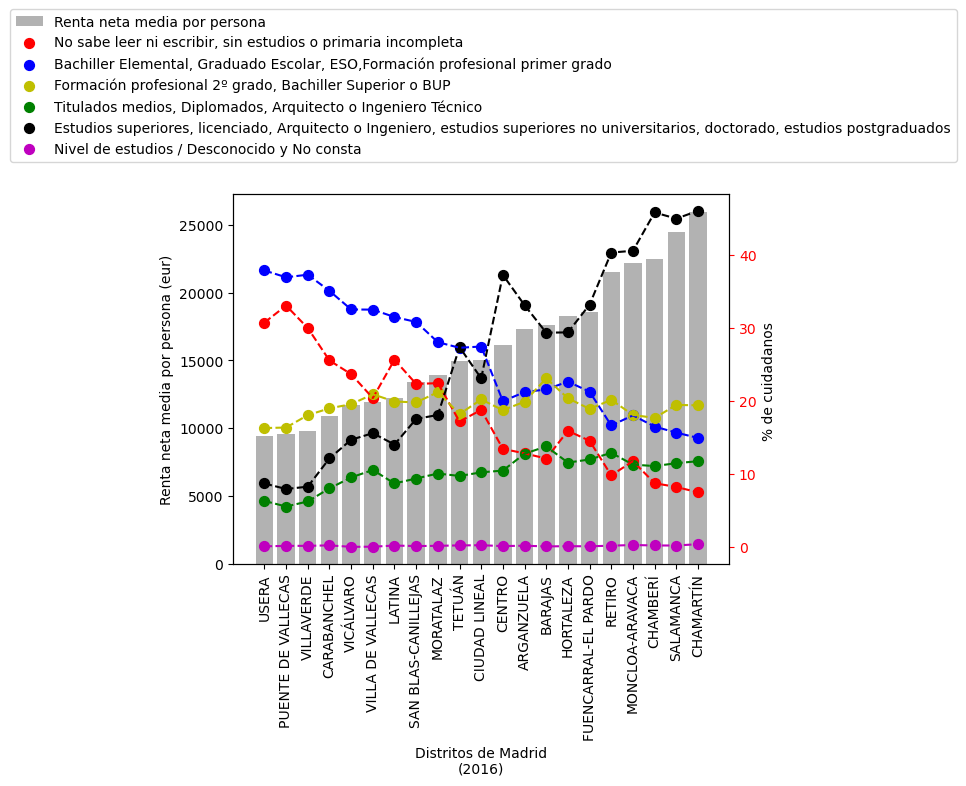

In [16]:
# Convertimos la variable Indicadores en index (nombre de las filas)
name_filas = df2.iloc[:,0].tolist()
df2.index = name_filas

# Borramos la columna indicadores
df2 = df2.drop(columns=['Indicadores'])

# Ordenas el dataframe según los datos de "Renta_neta_media_por_persona"
df2 = df2.iloc[:,1:].sort_values(by=var_INE_interes, axis = 1) # No seleccionamos los datos de "Ciudad" = iloc[:,1]

# ----------- Obtener los datos de la fila "Renta neta media por persona" -----------
data_renta = df2.iloc[14, :].copy(deep=True)

# ----------- Obtener los datos de las filas relacionadas con el nivel de educacion -----------
df_Edu = df2.iloc[2:8,:].copy(deep=True)

# Calculamos el porcentaje
df_Edu_per = df_Edu.div(df_Edu.sum(axis=0), axis=1) * 100

# Seleccionamos el indicador para su plot
data_Edu1 = df_Edu_per.iloc[0, :] # No sabe leer ni escribir
data_Edu2 = df_Edu_per.iloc[1, :] # Bachiller elemental
data_Edu3 = df_Edu_per.iloc[2, :] # Formación profesional
data_Edu4 = df_Edu_per.iloc[3, :] # Universitarios
data_Edu5 = df_Edu_per.iloc[4, :] # Estudios superiores
data_Edu6 = df_Edu_per.iloc[5, :] # No consta

# Crear una figura y un eje
fig, ax = plt.subplots()
plt.xticks(rotation=90)

# Crear un gráfico de barras con los datos de la fila "Renta"
l1 = ax.bar(data_renta.index, data_renta.values, 
            label="Renta neta media por persona", color='grey', alpha = 0.6)

# Crear un eje y de la derecha
ax2 = ax.twinx()

# Mostrar los datos de la fila "Row_4" como puntos en el eje y de la derecha
l2 = ax2.scatter(data_Edu1.index, data_Edu1.values, color ='r', marker='o', 
                 label=name_filas[2], s=50)
ax2.plot(data_Edu1.index, data_Edu1.values, color ='r', linestyle = 'dashed')
l3 = ax2.scatter(data_Edu2.index, data_Edu2.values, color ='b', marker='o', 
                 label=name_filas[3], s=50)
ax2.plot(data_Edu2.index, data_Edu2.values, color ='b', linestyle = 'dashed')
l4 = ax2.scatter(data_Edu3.index, data_Edu3.values, color ='y', marker='o', 
                 label=name_filas[4], s=50)
ax2.plot(data_Edu3.index, data_Edu3.values, color ='y', linestyle = 'dashed')
l5 = ax2.scatter(data_Edu4.index, data_Edu4.values, color ='g', marker='o', 
                 label=name_filas[5], s=50)
ax2.plot(data_Edu4.index, data_Edu4.values, color ='g', linestyle = 'dashed')
l6 = ax2.scatter(data_Edu5.index, data_Edu5.values, color ='k', marker='o', 
                 label=name_filas[6], s=50)
ax2.plot(data_Edu5.index, data_Edu5.values, color ='k', linestyle = 'dashed')
l7 = ax2.scatter(data_Edu6.index, data_Edu6.values, color ='m', marker='o', 
                 label=name_filas[7], s=50)
ax2.plot(data_Edu6.index, data_Edu6.values, color ='m', linestyle = 'dashed')

ax2.yaxis.set_tick_params(color='r', labelcolor='r')

# Añadir nombres a los ejes
ax.set_xlabel("Distritos de Madrid\n(2016)")

ax.set_ylabel("Renta neta media por persona (eur)")
ax2.set_ylabel("% de cuidadanos ")

#Agregar leyenda
# ax.legend()
# ax2.legend()
ax.legend(handles=[l1, l2, l3, l4, l5, l6, l7], 
          bbox_to_anchor=(-0.45, 1.5), loc=2, borderaxespad=0.)
# plt.legend(bbox_to_anchor=(-0.2, 1.4), loc=2, borderaxespad=0.)


# Mostrar la gráfica
plt.show()


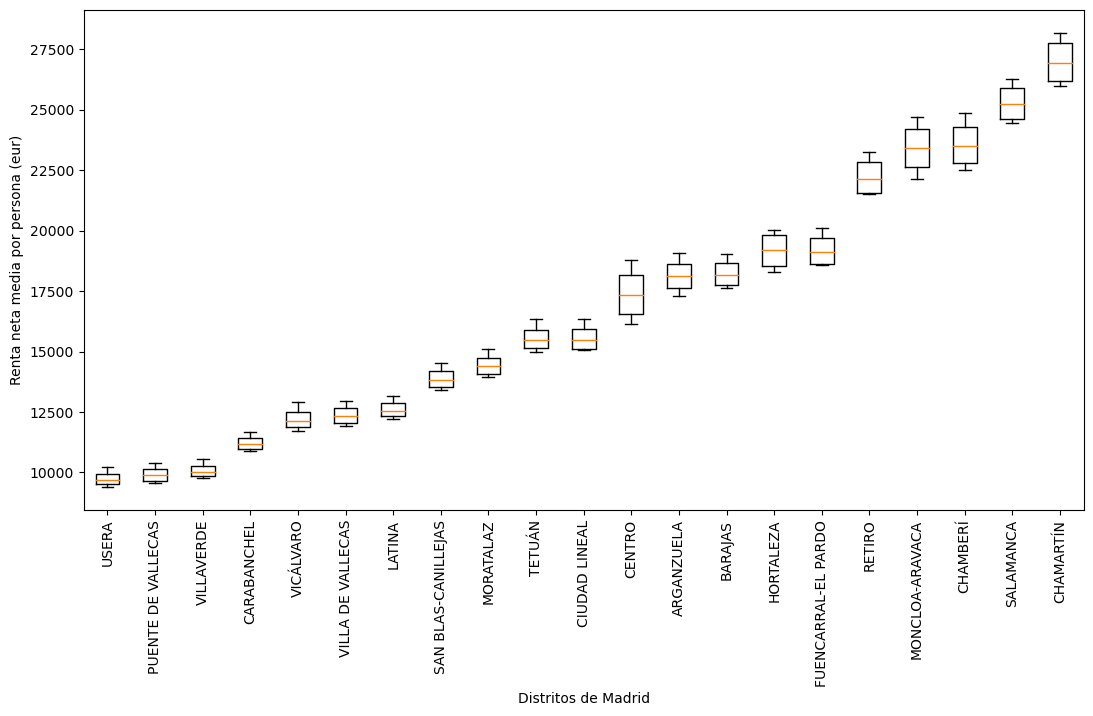

In [44]:
# Seleccionamos los años que queremos plotear
data2016 = data_2016.copy(deep=True)
data2017 = data_2017.copy(deep=True)
data2018 = data_2018.copy(deep=True)
data2019 = data_2019.copy(deep=True)

# Convertimos la variable Indicadores en index (nombre de las filas)
name_filas = data2016.iloc[:,0].tolist()
data2016.index = name_filas

# Borramos la columna indicadores
data2016 = data2016.drop(columns=['Indicadores'])
data2017 = data2017.drop(columns=['Indicadores'])
data2018 = data2018.drop(columns=['Indicadores'])
data2019 = data2019.drop(columns=['Indicadores'])

# Ordenas el dataframe según los datos de "Renta_neta_media_por_persona" de 2016
data2016 = data2016.iloc[:,1:].sort_values(by=var_INE_interes, axis = 1) # No seleccionamos los datos de "Ciudad" = iloc[:,1]
names_order = data2016.columns.values
data2017 = data2017[names_order]
data2018 = data2018[names_order]
data2019 = data2019[names_order]

# ----------- Obtener los datos de la fila "Renta neta media por persona" -----------
renta16 = data2016.iloc[14,:].copy(deep=True)
renta17 = data2017.iloc[14,:].copy(deep=True)
renta18 = data2018.iloc[14,:].copy(deep=True)
renta19 = data2019.iloc[14,:].copy(deep=True)

# Agrupamos todos los datos para hacer el boxplot
todas_rentas  = np.array([renta16, renta17, renta18, renta19])
fig = plt.figure(figsize =(10, 5))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(todas_rentas)
ax.set_xticklabels(data_renta.index)
plt.xticks(rotation=90)
ax.set_xlabel("Distritos de Madrid")
ax.set_ylabel("Renta neta media por persona (eur)")
# show plot
plt.show()

In [ ]:
# Selecciona las filas 1 y 2
row1 = df2.iloc[0] # Superficie
row2 = df2.iloc[1] # Densidad

# Calculamos la población de cada distrito
Poblacion = row1 * row2

# ----------- Obtener los datos de las filas relacionadas los colegios -----------
df_Colegio = df2.iloc[8:14, :].copy(deep=True)
sum_colegio = df_Colegio.sum(axis=0)

# Calculamos los valores de los centros por 100 000 habitantes: 
df_Colegio = df_Colegio.div(Poblacion, axis=1) * 100_000
sum_colegio_cap = df_Colegio.sum(axis=0)

data_col1 = df_Colegio.iloc[0,:]
data_col2 = df_Colegio.iloc[1,:]
data_col3 = df_Colegio.iloc[2,:]
data_col4 = df_Colegio.iloc[3,:]
data_col5 = df_Colegio.iloc[4,:]
data_col6 = df_Colegio.iloc[5,:]


# Crear una figura y un eje
fig, ax = plt.subplots()
plt.xticks(rotation=90)

# Crear un gráfico de barras con los datos de la fila "Renta"
l1 = ax.bar(data_renta.index, data_renta.values, 
            label="Renta neta media por persona", color='b', alpha=0.5)

# Crear un eje y de la derecha
ax2 = ax.twinx()

# Mostrar los datos de la fila "Row_4" como puntos en el eje y de la derecha
l2 = ax2.scatter(data_col1.index, data_col1.values, color ='r', marker='o', 
                 label=name_filas[8], s=50)
l3 = ax2.scatter(data_col2.index, data_col2.values, color ='b', marker='o', 
                 label=name_filas[9], s=50)
l4 = ax2.scatter(data_col3.index, data_col3.values, color ='y', marker='o', 
                 label=name_filas[10], s=50)
l5 = ax2.scatter(data_col4.index, data_col4.values, color ='g', marker='o', 
                 label=name_filas[11], s=50)
l6 = ax2.scatter(data_col5.index, data_col5.values, color ='k', marker='o', 
                 label=name_filas[12], s=50)
l7 = ax2.scatter(data_col6.index, data_col6.values, color ='m', marker='o', 
                 label=name_filas[13], s=50)

ax2.yaxis.set_tick_params(color='r', labelcolor='r')

# Añadir nombres a los ejes
ax.set_xlabel("Distritos de Madrid\n(2016)")

ax.set_ylabel("Renta neta media por persona (eur)")
ax2.set_ylabel("Centros de enseñanza por 100_000 habitantes")

#Agregar leyenda
# ax.legend()
# ax2.legend()
ax.legend(handles=[l1, l2, l3, l4, l5, l6, l7], 
          bbox_to_anchor=(-0.01, 1.5), loc=2, borderaxespad=0.)
# plt.legend(bbox_to_anchor=(-0.2, 1.4), loc=2, borderaxespad=0.)


# Mostrar la gráfica
plt.show()


In [ ]:

# Crear una figura y un eje
fig, ax = plt.subplots()
plt.xticks(rotation=90)

# Crear un gráfico de barras con los datos de la fila "Renta"
l1 = ax.bar(data_renta.index, data_renta.values, 
            label="Renta neta media por persona", color='b', alpha=0.5)

# Crear un eje y de la derecha
ax2 = ax.twinx()

# Mostrar los datos de la fila "Row_4" como puntos en el eje y de la derecha
l2 = ax2.scatter(sum_colegio_cap.index, sum_colegio_cap.values, color ='r', marker='o', 
                 label='Nº de centros de enseñanza', s=50)

ax2.yaxis.set_tick_params(color='r', labelcolor='r')

# Añadir nombres a los ejes
ax.set_xlabel("Distritos de Madrid\n(2016)")

ax.set_ylabel("Renta neta media por persona (eur)")
# ax2.set_ylabel("Nº de centros de enseñanza")
ax2.set_ylabel("Centros de enseñanza por 100_000 habitantes")

#Agregar leyenda
# ax.legend()
# ax2.legend()
ax.legend(handles=[l1, l2], 
          bbox_to_anchor=(0.18, 1.15), loc=2, borderaxespad=0.)
# plt.legend(bbox_to_anchor=(-0.2, 1.4), loc=2, borderaxespad=0.)


# Mostrar la gráfica
plt.show()


***
***